In [1]:
import pandas as pd
from tqdm.auto import tqdm
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
import math
tqdm.pandas()

In [2]:
road = 7
direction = "out"
df = pd.read_csv(f'../dataset/2020-02-road-{road}-{direction}.csv',parse_dates=["datetime"])
# df = df.drop(['all_units','samecell_units','max_speed','avg_traveltime','max_traveltime'],axis=1)
df

,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime
0,2020-02-01 00:00:34,7,0,out,10,4,7,6,60,105,0,0
1,2020-02-01 00:00:34,7,1,out,5,5,3,0,69,84,108,180
2,2020-02-01 00:00:34,7,2,out,3,3,2,0,79,98,59,60
3,2020-02-01 00:00:34,7,4,out,0,0,1,0,0,0,0,0
4,2020-02-01 00:00:34,7,6,out,2,2,1,0,68,75,64,86
...,...,...,...,...,...,...,...,...,...,...,...,...
4519315,2020-02-29 23:59:14,7,108,out,2,2,2,0,38,52,68,76
4519316,2020-02-29 23:59:14,7,109,out,1,1,3,0,36,36,60,60
4519317,2020-02-29 23:59:14,7,111,out,1,1,0,0,64,64,60,60
4519318,2020-02-29 23:59:14,7,113,out,0,0,1,0,0,0,0,0


In [3]:
df['inflow_units_N'] = (df["inflow_units"] - df["inflow_units"].min()) / (df["inflow_units"].max() - df["inflow_units"].min())
df['outflow_units_N'] = (df["outflow_unit"] - df["outflow_unit"].min()) / (df["outflow_unit"].max() - df["outflow_unit"].min())
df['avg_speed_N'] = (df["avg_speed"] - df["avg_speed"].min()) / (df["avg_speed"].max() - df["avg_speed"].min())
df

,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N
0,2020-02-01 00:00:34,7,0,out,10,4,7,6,60,105,0,0,0.076923,0.159091,0.7500
1,2020-02-01 00:00:34,7,1,out,5,5,3,0,69,84,108,180,0.096154,0.068182,0.8625
2,2020-02-01 00:00:34,7,2,out,3,3,2,0,79,98,59,60,0.057692,0.045455,0.9875
3,2020-02-01 00:00:34,7,4,out,0,0,1,0,0,0,0,0,0.000000,0.022727,0.0000
4,2020-02-01 00:00:34,7,6,out,2,2,1,0,68,75,64,86,0.038462,0.022727,0.8500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519315,2020-02-29 23:59:14,7,108,out,2,2,2,0,38,52,68,76,0.038462,0.045455,0.4750
4519316,2020-02-29 23:59:14,7,109,out,1,1,3,0,36,36,60,60,0.019231,0.068182,0.4500
4519317,2020-02-29 23:59:14,7,111,out,1,1,0,0,64,64,60,60,0.019231,0.000000,0.8000
4519318,2020-02-29 23:59:14,7,113,out,0,0,1,0,0,0,0,0,0.000000,0.022727,0.0000


In [4]:
# sns.pairplot(df,vars=['inflow_units_N','outflow_units_N','avg_speed_N'],hue="cluster")

In [5]:
# fig = px.scatter_matrix(df.drop(["datetime","road_number","km","direction","inflow_units","outflow_unit","avg_speed"],axis=1),width=600, height=1000)
# fig.show()

In [6]:
df.max(axis=0)

datetime           2020-02-29 23:59:14
road_number                          7
km                                 124
direction                          out
all_units                           78
inflow_units                        52
outflow_unit                        44
samecell_units                      60
avg_speed                           80
max_speed                          212
avg_traveltime                     990
max_traveltime                     998
inflow_units_N                     1.0
outflow_units_N                    1.0
avg_speed_N                        1.0
dtype: object

In [7]:
X = df[['inflow_units_N','outflow_units_N','avg_speed_N']].values
X

array([[0.07692308, 0.15909091, 0.75      ],
       [0.09615385, 0.06818182, 0.8625    ],
       [0.05769231, 0.04545455, 0.9875    ],
       ...,
       [0.01923077, 0.        , 0.8       ],
       [0.        , 0.02272727, 0.        ],
       [0.01923077, 0.        , 0.6375    ]])

In [8]:
# WCSS = []
# for i in range(1,11):
#     model = KMeans(n_clusters = i,init = 'k-means++')
#     model.fit(X)
#     WCSS.append(model.inertia_)
# fig = plt.figure(figsize = (7,7))
# plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'blue')
# plt.xticks(np.arange(11))
# plt.xlabel("Number of clusters")
# plt.ylabel("WCSS")
# plt.show()

In [9]:
model = KMeans(n_clusters = 5,init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X)
df['cluster'] = y_clusters
y_clusters

array([0, 2, 2, ..., 2, 1, 0])

C:\Users\NITIKORN\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

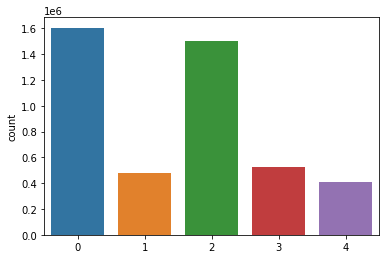

In [10]:
sns.countplot(y_clusters)

In [11]:
X

array([[0.07692308, 0.15909091, 0.75      ],
       [0.09615385, 0.06818182, 0.8625    ],
       [0.05769231, 0.04545455, 0.9875    ],
       ...,
       [0.01923077, 0.        , 0.8       ],
       [0.        , 0.02272727, 0.        ],
       [0.01923077, 0.        , 0.6375    ]])

In [12]:
print(X[y_clusters == 0,0][0])
print(X[y_clusters == 0,1][0])
print(X[y_clusters == 0,2][0])

0.07692307692307693
0.1590909090909091
0.75


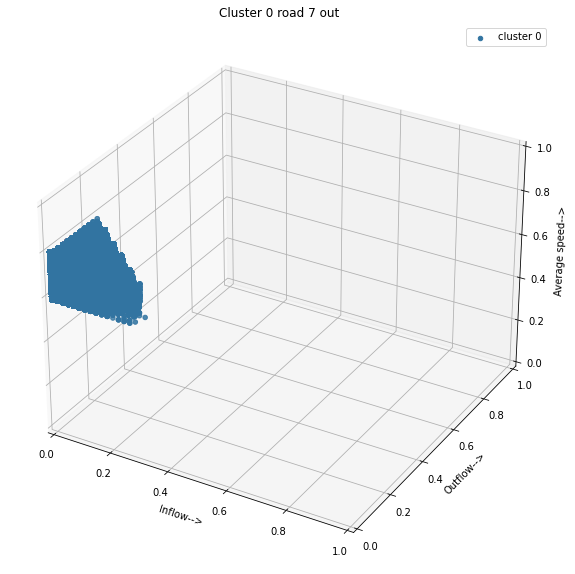

In [13]:
fig1 = plt.figure(figsize = (10,10))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 20 , color = '#3274A1', label = "cluster 0")
ax1.set_xlim3d(0,1)
ax1.set_ylim3d(0,1)
ax1.set_zlim3d(0,1)
ax1.set_xlabel('Inflow-->')
ax1.set_ylabel('Outflow-->')
ax1.set_zlabel('Average speed-->')
ax1.set_title(f"Cluster 0 road {road} {direction}")
ax1.legend()
plt.show()

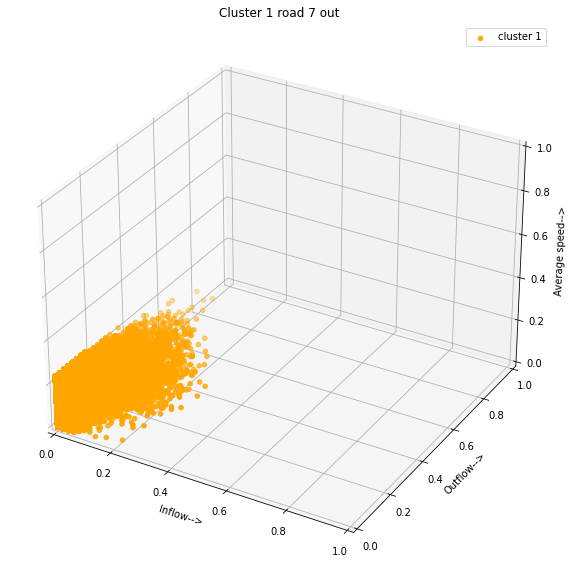

In [14]:
fig2 = plt.figure(figsize = (10,10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 20 , color = 'orange', label = "cluster 1")
ax2.set_xlim3d(0,1)
ax2.set_ylim3d(0,1)
ax2.set_zlim3d(0,1)
ax2.set_xlabel('Inflow-->')
ax2.set_ylabel('Outflow-->')
ax2.set_zlabel('Average speed-->')
ax2.set_title(f"Cluster 1 road {road} {direction}")
ax2.legend()
plt.show()

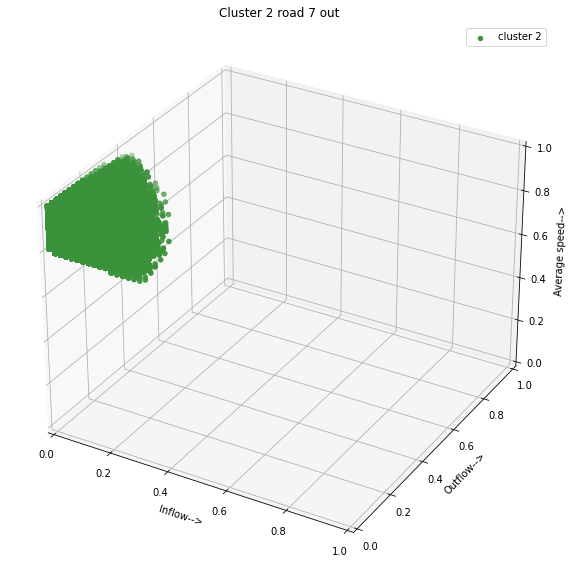

In [15]:
fig3 = plt.figure(figsize = (10,10))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 20 , color = '#3A923A', label = "cluster 2")
ax3.set_xlim3d(0,1)
ax3.set_ylim3d(0,1)
ax3.set_zlim3d(0,1)
ax3.set_xlabel('Inflow-->')
ax3.set_ylabel('Outflow-->')
ax3.set_zlabel('Average speed-->')
ax3.set_title(f"Cluster 2 road {road} {direction}")
ax3.legend()
plt.show()

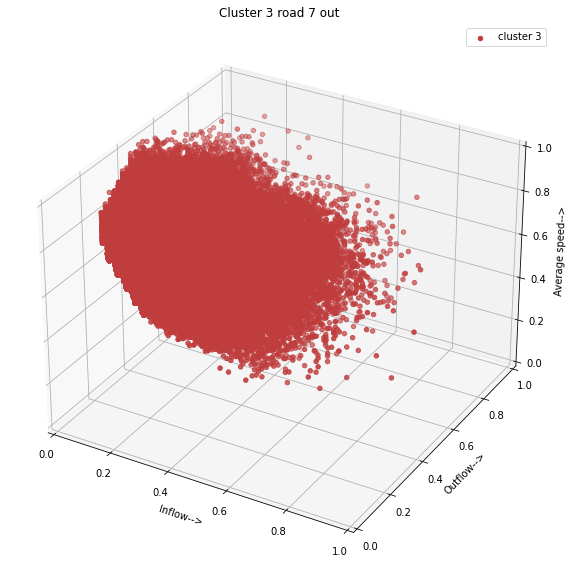

In [16]:
fig4 = plt.figure(figsize = (10,10))
ax4 = fig4.add_subplot(111, projection='3d')
ax4.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 20 , color = '#C03D3E', label = "cluster 3")
ax4.set_xlim3d(0,1)
ax4.set_ylim3d(0,1)
ax4.set_zlim3d(0,1)
ax4.set_xlabel('Inflow-->')
ax4.set_ylabel('Outflow-->')
ax4.set_zlabel('Average speed-->')
ax4.set_title(f"Cluster 3 road {road} {direction}")
ax4.legend()
plt.show()

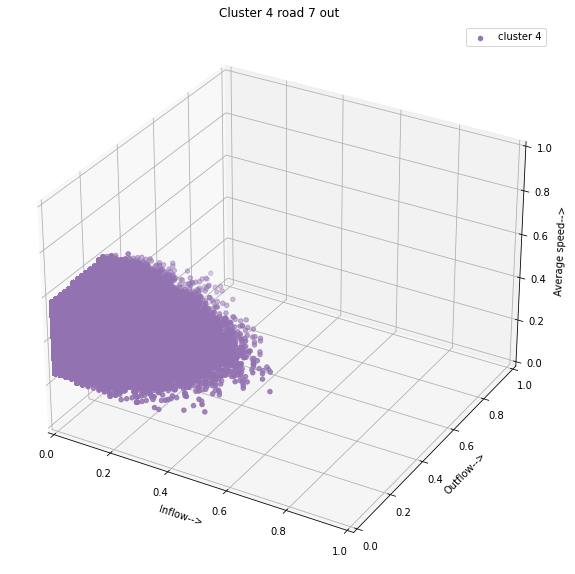

In [17]:
fig5 = plt.figure(figsize = (10,10))
ax5 = fig5.add_subplot(111, projection='3d')
ax5.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 20 , color = '#9372B2', label = "cluster 4")
ax5.set_xlim3d(0,1)
ax5.set_ylim3d(0,1)
ax5.set_zlim3d(0,1)
ax5.set_xlabel('Inflow-->')
ax5.set_ylabel('Outflow-->')
ax5.set_zlabel('Average speed-->')
ax5.set_title(f"Cluster 4 road {road} {direction}")
ax5.legend()
plt.show()

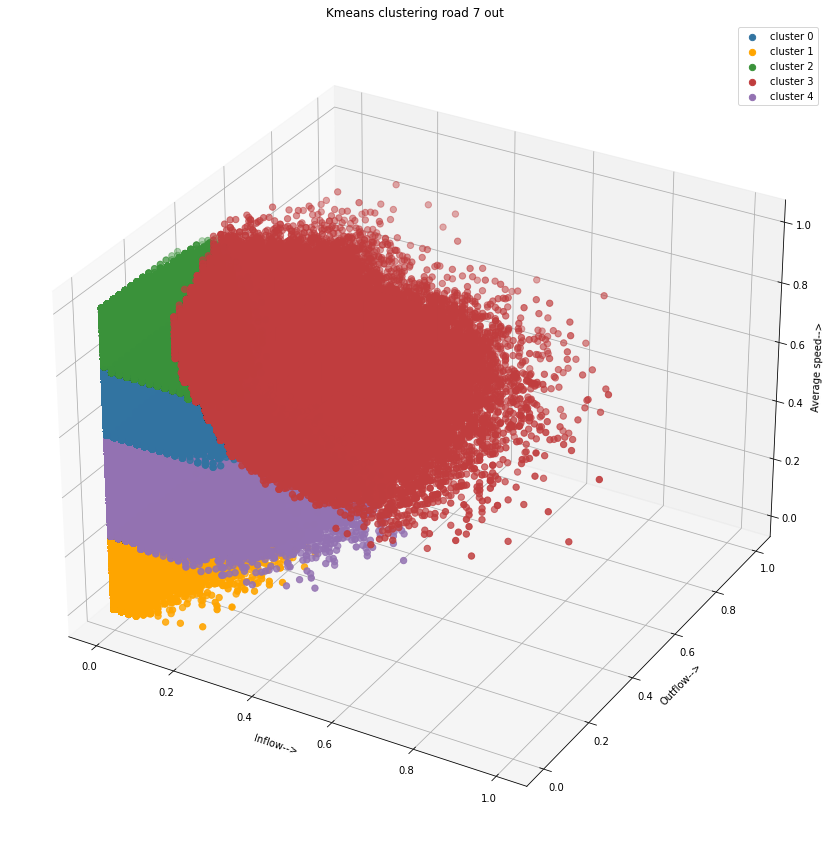

In [18]:
fig6 = plt.figure(figsize = (15,15))
ax6 = fig6.add_subplot(111, projection='3d')
ax6.scatter(X[y_clusters == 0,0],X[y_clusters == 0,1],X[y_clusters == 0,2], s = 40 , color = '#3274A1', label = "cluster 0")
ax6.scatter(X[y_clusters == 1,0],X[y_clusters == 1,1],X[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax6.scatter(X[y_clusters == 2,0],X[y_clusters == 2,1],X[y_clusters == 2,2], s = 40 , color = '#3A923A', label = "cluster 2")
ax6.scatter(X[y_clusters == 3,0],X[y_clusters == 3,1],X[y_clusters == 3,2], s = 40 , color = '#C03D3E', label = "cluster 3")
ax6.scatter(X[y_clusters == 4,0],X[y_clusters == 4,1],X[y_clusters == 4,2], s = 40 , color = '#9372B2', label = "cluster 4")
# ax.scatter(X[y_clusters == 5,0],X[y_clusters == 5,1],X[y_clusters == 5,2], s = 40 , color = 'cyan', label = "cluster 5")
# ax.scatter(X[y_clusters == 6,0],X[y_clusters == 6,1],X[y_clusters == 6,2], s = 40 , color = 'yellow', label = "cluster 6")
ax6.set_xlabel('Inflow-->')
ax6.set_ylabel('Outflow-->')
ax6.set_zlabel('Average speed-->')
ax6.set_title(f"Kmeans clustering road {road} {direction}")
ax6.legend()
plt.show()

In [19]:
# df.to_csv(f"../dataset/cluster/2020-02-road{road}-{direction}-5cluster.csv",index=False)